<a href="https://colab.research.google.com/github/Hitika-Jain/ParkInsight/blob/main/mri_datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 24.9 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import SimpleITK as sitk
from tqdm import tqdm
from scipy.ndimage import zoom

INPUT_DIRS = {
    'PD': r"/content/drive/MyDrive/Parkinson's image",
    'HC': r"/content/drive/MyDrive/Healthy Images"
}
OUTPUT_DIR = r"C:\Users\hitik\Downloads\PPMI_voxels"
TARGET_SHAPE = (128, 128, 128)

def load_dicom_series(dicom_folder):
    reader = sitk.ImageSeriesReader()
    series_IDs = reader.GetGDCMSeriesIDs(dicom_folder)
    if not series_IDs:
        raise ValueError(f"No DICOM series in {dicom_folder}")
    series_file_names = reader.GetGDCMSeriesFileNames(dicom_folder, series_IDs[0])
    reader.SetFileNames(series_file_names)
    image = reader.Execute()
    volume = sitk.GetArrayFromImage(image)  # [slices, H, W]
    return np.transpose(volume, (1, 2, 0))  # → [H, W, D]

def resize_volume(img, target_shape):
    factors = [t / s for t, s in zip(target_shape, img.shape)]
    return zoom(img, zoom=factors, order=1)

def normalize(volume):
    return (volume - np.mean(volume)) / np.std(volume)

def get_latest_scan_folder(scan_parent_folder):
    subfolders = [
        os.path.join(scan_parent_folder, name) for name in os.listdir(scan_parent_folder)
        if os.path.isdir(os.path.join(scan_parent_folder, name))
    ]
    if not subfolders:
        return None
    # Sort by name or number of files
    subfolders.sort(key=lambda x: len(os.listdir(x)), reverse=True)
    return subfolders[0]

for label, base_path in INPUT_DIRS.items():
    output_label_path = os.path.join(OUTPUT_DIR, label)
    os.makedirs(output_label_path, exist_ok=True)

    for subject in tqdm(os.listdir(base_path), desc=f"Processing {label}"):
        subject_path = os.path.join(base_path, subject)
        t1_folder = os.path.join(subject_path, "SAG_3D_T1_FSPGR")

        if not os.path.exists(t1_folder):
            continue

        scan_folder = get_latest_scan_folder(t1_folder)
        if not scan_folder:
            continue

        try:
            volume = load_dicom_series(scan_folder)
            volume = resize_volume(volume, TARGET_SHAPE)
            volume = normalize(volume)
            save_path = os.path.join(output_label_path, f"{subject}.npy")
            np.save(save_path, volume)
        except Exception as e:
            print(f"Failed to process {subject}: {e}")


Processing PD:   8%|▊         | 1/12 [00:00<00:10,  1.03it/s]

Failed to process 105711: No DICOM series in /content/drive/MyDrive/Parkinson's image/105711/SAG_3D_T1_FSPGR/2023-09-14_15_41_14.0


Processing PD:  50%|█████     | 6/12 [00:02<00:02,  2.63it/s]

Failed to process 101187: No DICOM series in /content/drive/MyDrive/Parkinson's image/101187/SAG_3D_T1_FSPGR/2022-06-10_12_51_14.0


Processing PD: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]


Failed to process 100001: No DICOM series in /content/drive/MyDrive/Parkinson's image/100001/SAG_3D_T1_FSPGR/2024-09-11_08_52_49.0


Processing HC: 100%|██████████| 14/14 [00:01<00:00,  9.56it/s]


In [ ]:
import os
import numpy as np
import SimpleITK as sitk
from tqdm import tqdm
from scipy.ndimage import zoom

INPUT_DIRS = {
    'PD': r"/content/drive/MyDrive/Parkinson's image",
    'HC': r"/content/drive/MyDrive/Healthy Images"
}
OUTPUT_DIR = "/content/drive/MyDrive/PPMI_voxels"
TARGET_SHAPE = (128, 128, 128)

def is_dicom_series(folder):
    try:
        reader = sitk.ImageSeriesReader()
        series_IDs = reader.GetGDCMSeriesIDs(folder)
        return len(series_IDs) > 0
    except:
        return False

def load_dicom_series(dicom_folder):
    reader = sitk.ImageSeriesReader()
    series_IDs = reader.GetGDCMSeriesIDs(dicom_folder)
    if not series_IDs:
        raise ValueError(f"No DICOM series in {dicom_folder}")
    series_file_names = reader.GetGDCMSeriesFileNames(dicom_folder, series_IDs[0])
    reader.SetFileNames(series_file_names)
    image = reader.Execute()
    volume = sitk.GetArrayFromImage(image)
    return np.transpose(volume, (1, 2, 0))  # [H, W, D]

def resize_volume(img, target_shape):
    factors = [t / s for t, s in zip(target_shape, img.shape)]
    return zoom(img, zoom=factors, order=1)

def normalize(volume):
    return (volume - np.mean(volume)) / np.std(volume)

for label, base_path in INPUT_DIRS.items():
    output_label_path = os.path.join(OUTPUT_DIR, label)
    os.makedirs(output_label_path, exist_ok=True)

    for subject in tqdm(os.listdir(base_path), desc=f"Processing {label}"):
        subject_path = os.path.join(base_path, subject)

        for root, dirs, files in os.walk(subject_path):
            if is_dicom_series(root):
                try:
                    volume = load_dicom_series(root)
                    volume = resize_volume(volume, TARGET_SHAPE)
                    volume = normalize(volume)
                    rel_path = os.path.relpath(root, base_path).replace(os.sep, '_')
                    save_name = f"{rel_path}.npy"
                    save_path = os.path.join(output_label_path, save_name)
                    np.save(save_path, volume)
                except Exception as e:
                    print(f"Failed to process {root}: {e}")

Processing PD:  50%|█████     | 6/12 [02:55<02:39, 26.51s/it]

Failed to process /content/drive/MyDrive/Parkinson's image/101175/3D_T1-weighted/2022-05-10_10_17_05.0/I1582565: axes don't match array
Failed to process /content/drive/MyDrive/Parkinson's image/101175/3D_T1-weighted/2021-04-27_10_21_26.0/I1493064: axes don't match array


Processing PD:  58%|█████▊    | 7/12 [03:11<01:53, 22.80s/it]

Failed to process /content/drive/MyDrive/Parkinson's image/101179/Coronal/2021-04-27_08_51_24.0/I1493071: axes don't match array
Failed to process /content/drive/MyDrive/Parkinson's image/101179/3D_T1-weighted/2022-04-04_10_40_25.0/I1571515: axes don't match array


Processing PD:  67%|██████▋   | 8/12 [03:30<01:26, 21.60s/it]

Failed to process /content/drive/MyDrive/Parkinson's image/101179/3D_T1-weighted/2021-04-27_08_51_24.0/I1493072: axes don't match array


Processing PD:  83%|████████▎ | 10/12 [04:24<00:50, 25.02s/it]

Failed to process /content/drive/MyDrive/Parkinson's image/101124/3D_T1-weighted/2022-05-18_10_32_30.0/I1583926: axes don't match array


Processing PD:  92%|█████████▏| 11/12 [04:42<00:22, 22.77s/it]

Failed to process /content/drive/MyDrive/Parkinson's image/101124/3D_T1-weighted/2021-04-19_10_21_30.0/I1493057: axes don't match array


Processing HC:  14%|█▍        | 2/14 [00:24<02:04, 10.41s/it]

Failed to process /content/drive/MyDrive/Healthy Images/156459/3D_T1-weighted/2022-11-29_08_59_06.0/I1652981: axes don't match array


Processing HC:  36%|███▌      | 5/14 [00:53<01:24,  9.42s/it]

Failed to process /content/drive/MyDrive/Healthy Images/187759/3D_T1-weighted/2023-02-28_09_47_14.0/I1678671: Exception thrown in SimpleITK ImageSeriesReader_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-5.4/itkImageSeriesReader.hxx:351:
ITK ERROR: ImageSeriesReader(0x37fba10): Size mismatch! The size of  /content/drive/MyDrive/Healthy Images/187759/3D_T1-weighted/2023-02-28_09_47_14.0/I1678671/PPMI_187759_MR_3D_T1-weighted_br_raw_20230316215834573_1_S1205242_I1678671.dcm is [256, 256, 192] and does not match the required size [256, 256, 1] from file /content/drive/MyDrive/Healthy Images/187759/3D_T1-weighted/2023-02-28_09_47_14.0/I1678671/PPMI_187759_MR_3D_T1-weighted_br_raw_20230316213618246_1_S1205242_I1678671.dcm


Processing HC: 100%|██████████| 14/14 [03:19<00:00, 14.24s/it]


In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.0 MB/s eta 0:00:00


this is the correct code, just run nhi hua

In [ ]:
import os
import pydicom
import numpy as np
from glob import glob
from tqdm import tqdm

def load_dicom_volume(dicom_dir):
    dicom_files = glob(os.path.join(dicom_dir, "*.dcm"))
    slices = []
    for f in dicom_files:
        try:
            ds = pydicom.dcmread(f)
            slices.append(ds)
        except:
            continue

    if not slices:
        return None

    slices.sort(key=lambda s: int(s.InstanceNumber))

    images = [s.pixel_array for s in slices]
    try:
        volume = np.stack(images, axis=0).astype(np.float32)
    except:
        return None

    # Normalize to [0, 1]
    volume -= np.min(volume)
    volume /= np.max(volume) + 1e-5

    return volume

def process_all_scans(root_dir, save_dir, label):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    patient_ids = os.listdir(root_dir)

    for pid in tqdm(patient_ids, desc=f"Processing {label}"):
        pid_path = os.path.join(root_dir, pid)
        if not os.path.isdir(pid_path):
            continue

        for subdir, _, _ in os.walk(pid_path):
            if subdir == pid_path:
                continue
            volume = load_dicom_volume(subdir)
            if volume is not None:
                save_path = os.path.join(save_dir, f"{label}_{pid}.npy")
                np.save(save_path, volume)
                break  # Save only the first valid scan per patient

# Paths
pd_root = "/content/drive/MyDrive/Parkinson's image"
hc_root = "/content/drive/MyDrive/Healthy Images"
save_path = "/content/drive/MyDrive/3D_Numpy_Volumes"

# Process
process_all_scans(pd_root, os.path.join(save_path, "pd"), label="pd")
process_all_scans(hc_root, os.path.join(save_path, "hc"), label="hc")

Processing pd:  25%|██▌       | 3/12 [00:51<02:34, 17.13s/it]


KeyboardInterrupt: 

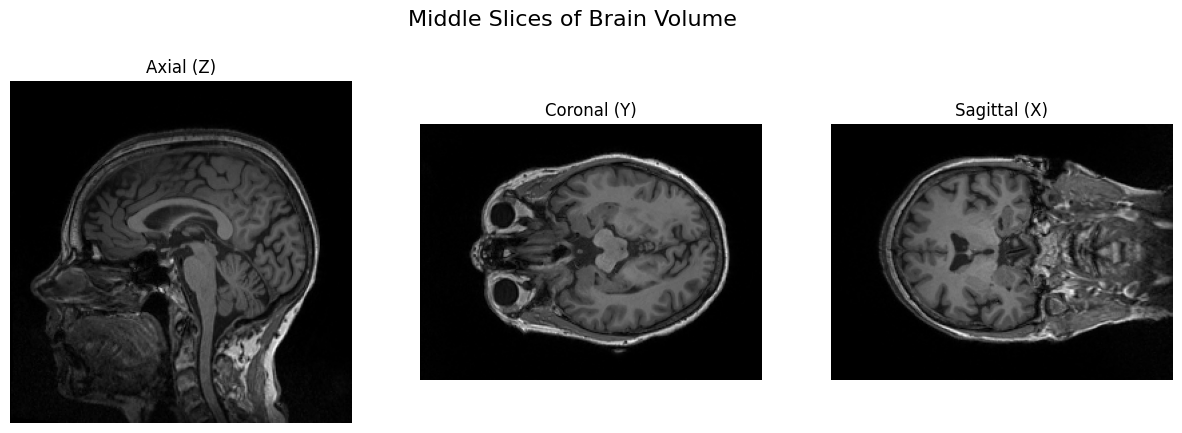

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load any one 3D scan (adjust path accordingly)
volume = np.load("/content/drive/MyDrive/3D_Numpy_Volumes/hc/hc_130028.npy")

# Define middle slices along each axis
z, y, x = volume.shape
slices = {
    "Axial (Z)": volume[z // 2, :, :],
    "Coronal (Y)": volume[:, y // 2, :],
    "Sagittal (X)": volume[:, :, x // 2]
}

# Plot
plt.figure(figsize=(15, 5))
for i, (title, img) in enumerate(slices.items()):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.suptitle("Middle Slices of Brain Volume", fontsize=16)
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Load your volume (change the path to any .npy scan)
volume = np.load("/content/drive/MyDrive/3D_Numpy_Volumes/hc/hc_130028.npy")

# Optional: Normalize the volume between 0 and 1 for display
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))

# Create the 3D volume rendering
fig = go.Figure(data=go.Volume(
    x=np.arange(0, volume.shape[2], 1),
    y=np.arange(0, volume.shape[1], 1),
    z=np.arange(0, volume.shape[0], 1),
    value=volume,
    opacity=0.1,         # Adjust for transparency
    surface_count=30,    # Number of isosurfaces
    colorscale='Gray',   # Use grayscale for MRI
))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title="3D Brain Visualization (Voxel-based)",
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

In [ ]:
import numpy as np

volume = np.load("/content/drive/MyDrive/3D_Numpy_Volumes/hc/hc_130028.npy")
print("Shape:", volume.shape)
print("Min:", np.min(volume), "Max:", np.max(volume), "Unique:", np.unique(volume))

Shape: (192, 256, 256)
Min: 0.0 Max: 1.0 Unique: [0.         0.00155521 0.00311042 0.00466563 0.00622084 0.00777605
 0.00933126 0.01088647 0.01244168 0.01399689 0.0155521  0.01710731
 0.01866252 0.02021773 0.02177294 0.02332815 0.02488336 0.02643857
 0.02799378 0.02954899 0.0311042  0.03265941 0.03421462 0.03576983
 0.03732504 0.03888025 0.04043546 0.04199067 0.04354588 0.04510109
 0.0466563  0.04821151 0.04976672 0.05132193 0.05287714 0.05443235
 0.05598756 0.05754277 0.05909798 0.06065319 0.0622084  0.06376361
 0.06531882 0.06687403 0.06842924 0.06998445 0.07153966 0.07309487
 0.07465008 0.07620529 0.0777605  0.07931571 0.08087092 0.08242613
 0.08398134 0.08553655 0.08709176 0.08864697 0.09020218 0.09175739
 0.0933126  0.09486781 0.09642301 0.09797823 0.09953344 0.10108865
 0.10264385 0.10419907 0.10575428 0.10730949 0.10886469 0.11041991
 0.11197512 0.11353032 0.11508553 0.11664075 0.11819596 0.11975116
 0.12130637 0.12286159 0.1244168  0.125972   0.12752722 0.12908243
 0.13063763 0

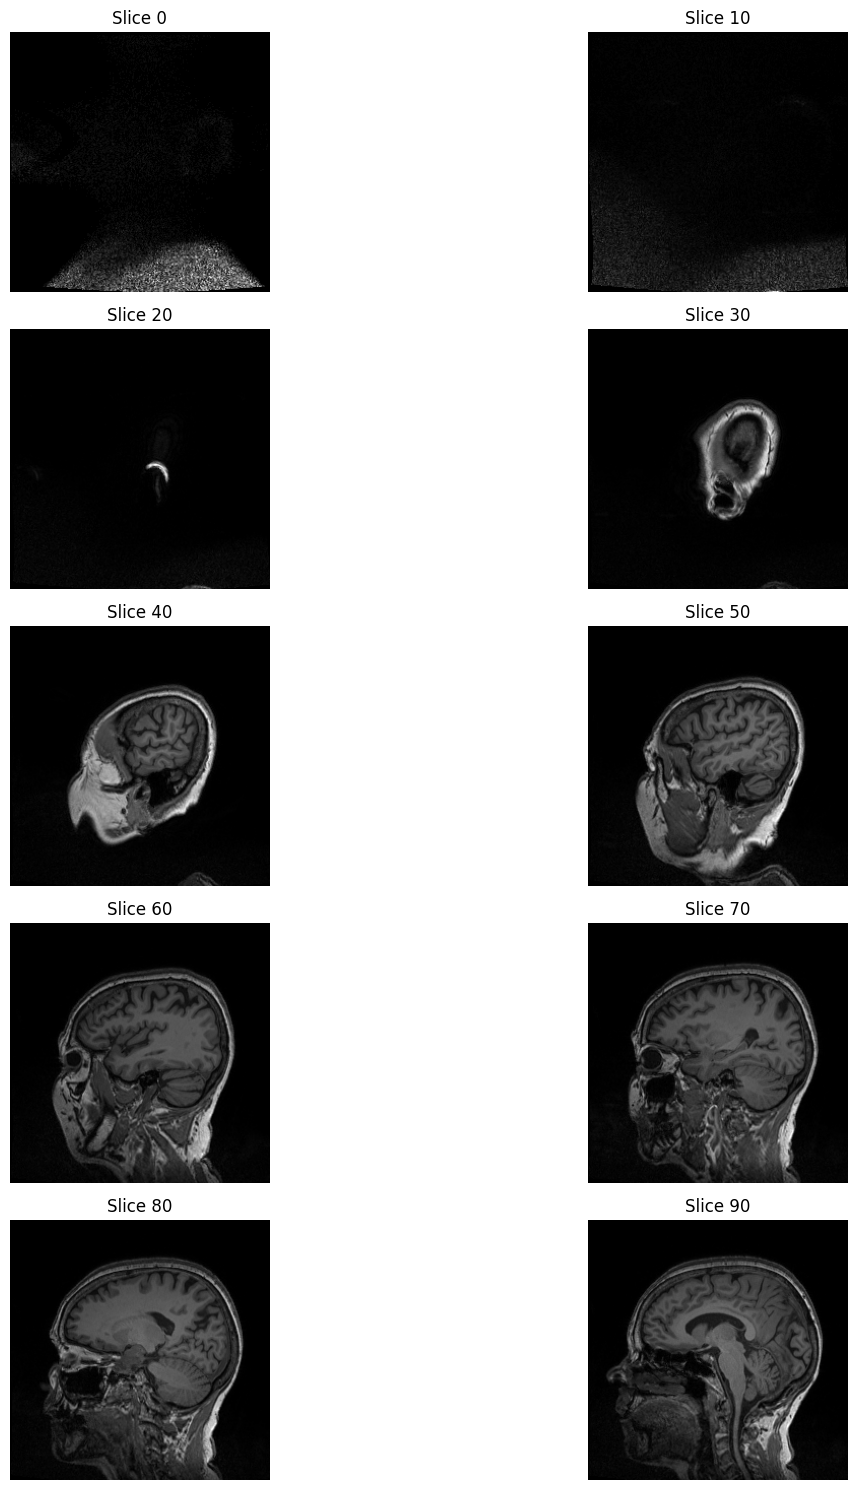

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i in range(0, 100, 10):
    plt.subplot(5, 2, i//10 + 1)
    plt.imshow(volume[i], cmap='gray')
    plt.title(f'Slice {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

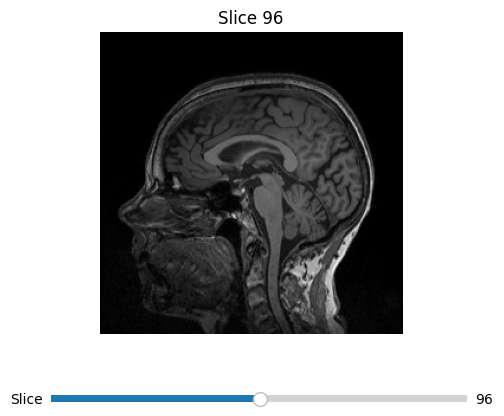

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Create a figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
slice_index = volume.shape[0] // 2
img = ax.imshow(volume[slice_index], cmap='gray')
ax.set_title(f"Slice {slice_index}")
ax.axis('off')

# Slider
ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Slice', 0, volume.shape[0] - 1, valinit=slice_index, valstep=1)

def update(val):
    idx = int(slider.val)
    img.set_data(volume[idx])
    ax.set_title(f"Slice {idx}")
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def show_slice(slice_index):
    plt.figure(figsize=(5, 5))
    plt.imshow(volume[slice_index], cmap='gray')
    plt.title(f"Slice {slice_index}")
    plt.axis('off')
    plt.show()

# Create interactive slider
widgets.interact(show_slice, slice_index=widgets.IntSlider(min=0, max=volume.shape[0]-1, step=1, value=volume.shape[0]//2))

interactive(children=(IntSlider(value=96, description='slice_index', max=191), Output()), _dom_classes=('widge…

<function __main__.show_slice(slice_index)>

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def show_axial(slice_index):
    plt.figure(figsize=(5, 5))
    plt.imshow(volume[slice_index], cmap='gray')
    plt.title(f'Axial Slice (Top-Down View) - {slice_index}')
    plt.axis('off')
    plt.show()

widgets.interact(show_axial, slice_index=widgets.IntSlider(min=0, max=volume.shape[0]-1, step=1, value=volume.shape[0]//2))

interactive(children=(IntSlider(value=96, description='slice_index', max=191), Output()), _dom_classes=('widge…

<function __main__.show_axial(slice_index)>

In [ ]:
print(volume.shape)

(192, 256, 256)


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def show_views(slice_index):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Sagittal view (slice along axis=0)
    axes[0].imshow(volume[slice_index, :, :], cmap='gray')
    axes[0].set_title(f"Sagittal (X={slice_index})")
    axes[0].axis('off')

    # Coronal view (slice along axis=1)
    axes[1].imshow(volume[:, slice_index, :], cmap='gray')
    axes[1].set_title(f"Coronal (Y={slice_index})")
    axes[1].axis('off')

    # Axial view (slice along axis=2)
    axes[2].imshow(volume[:, :, slice_index], cmap='gray')
    axes[2].set_title(f"Axial / Top-Down (Z={slice_index})")
    axes[2].axis('off')

    plt.show()

widgets.interact(
    show_views,
    slice_index=widgets.IntSlider(min=0, max=255, step=1, value=128)
)

interactive(children=(IntSlider(value=128, description='slice_index', max=255), Output()), _dom_classes=('widg…

<function __main__.show_views(slice_index)>

In [ ]:
voxel_size = (32, 32, 32)  # Depth, Height, Width of each cube

In [ ]:
def extract_voxels(volume, voxel_size=(32, 32, 32), stride=None):
    D, H, W = volume.shape
    vd, vh, vw = voxel_size
    stride = stride or voxel_size  # can set smaller stride for overlapping

    voxels = []
    positions = []

    for z in range(0, D - vd + 1, stride[0]):
        for y in range(0, H - vh + 1, stride[1]):
            for x in range(0, W - vw + 1, stride[2]):
                cube = volume[z:z+vd, y:y+vh, x:x+vw]
                voxels.append(cube)
                positions.append((z, y, x))

    return np.array(voxels), positions

In [ ]:
voxels, positions = extract_voxels(volume, voxel_size=(32, 32, 32))
print("Number of voxel cubes:", len(voxels))

Number of voxel cubes: 384


In [ ]:
center_crop = volume[40:152, 64:192, 64:192]  # roughly center cube
voxels, positions = extract_voxels(center_crop, voxel_size=(32, 32, 32))

In [ ]:
print("Number of voxel cubes:", len(voxels))

Number of voxel cubes: 48


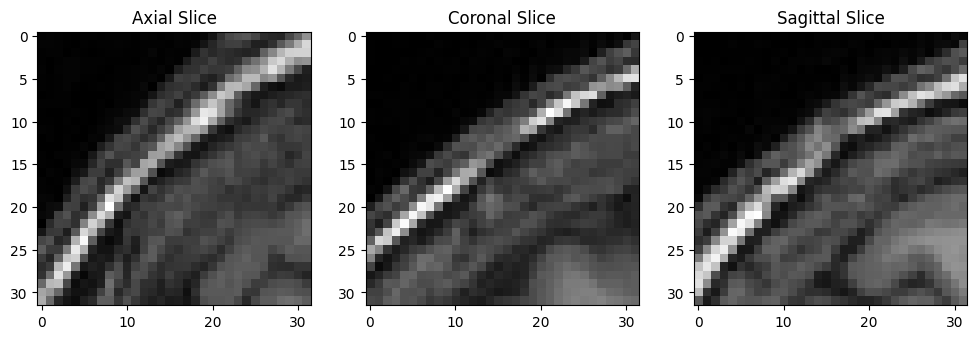

In [ ]:
import matplotlib.pyplot as plt

def show_voxel(voxel):
    mid_slices = [s // 2 for s in voxel.shape]
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(voxel[mid_slices[0], :, :], cmap='gray')
    axes[0].set_title("Axial Slice")
    axes[1].imshow(voxel[:, mid_slices[1], :], cmap='gray')
    axes[1].set_title("Coronal Slice")
    axes[2].imshow(voxel[:, :, mid_slices[2]], cmap='gray')
    axes[2].set_title("Sagittal Slice")
    plt.show()

show_voxel(voxels[0])

In [ ]:
import os
import numpy as np
from tqdm import tqdm
import pickle

# Your base folder
base_dir = "/content/drive/MyDrive/3D_Numpy_Volumes"

# Output folder for voxel data
output_dir = "/content/voxel_output"
os.makedirs(output_dir, exist_ok=True)

# Voxel settings
voxel_size = (32, 32, 32)
stride = (32, 32, 32)

def crop_brain(volume):
    # Squeeze out any singleton dimensions (1s)
    volume = np.squeeze(volume)

    # Check shape again to be sure it's now 3D
    if volume.ndim != 3:
        raise ValueError(f"Expected 3D volume after squeeze, got shape: {volume.shape}")

    # Crop (D, H, W)
    return volume[40:152, 64:192, 64:192]

def make_voxels(volume):
    voxels = []
    D, H, W = volume.shape
    for d in range(0, D - voxel_size[0] + 1, stride[0]):
        for h in range(0, H - voxel_size[1] + 1, stride[1]):
            for w in range(0, W - voxel_size[2] + 1, stride[2]):
                cube = volume[d:d+32, h:h+32, w:w+32]
                voxels.append(cube)
    return np.array(voxels)  # shape: (num_voxels, 32, 32, 32)

# Final dataset list
all_data = []

# Loop through hc and pd folders
for label_name, label_val in [('hc', 0), ('pd', 1)]:
    folder = os.path.join(base_dir, label_name)
    files = sorted(os.listdir(folder))

    for f in tqdm(files, desc=f"Processing {label_name}"):
        if not f.endswith('.npy'):
            continue
        filepath = os.path.join(folder, f)
        brain = np.load(filepath)
        cropped = crop_brain(brain)
        # print(f"{f} shape before cropping: {brain.shape}")
        # print(f"{f} shape after cropping: {cropped.shape}")

        voxels = make_voxels(cropped)

        data = {
            'voxels': voxels,  # shape: (48, 32, 32, 32)
            'label': label_val,
            'filename': f
        }

        # Save each brain’s voxel as a .pkl
        out_path = os.path.join(output_dir, f.replace('.npy', '.pkl'))
        with open(out_path, 'wb') as out_f:
            pickle.dump(data, out_f)

        # Also store in master list if needed later
        all_data.append(data)


Processing pd: 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


In [ ]:
import numpy as np

volume = np.load("/content/drive/MyDrive/3D_Numpy_Volumes/hc/hc_130028.npy")  # Shape: (H, W, D) - depends on your format
print(volume.shape)


(192, 256, 256)


In [ ]:
!pip install nilearn nibabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 47.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import nibabel as nib
import os

def convert_npy_to_nifti(npy_path, output_path):
    data = np.load(npy_path)
    # Dummy affine, assumes data is aligned well
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(data, affine)
    nib.save(nifti_img, output_path)

# Example usage
convert_npy_to_nifti('/content/drive/MyDrive/3D_Numpy_Volumes/hc/hc_130028.npy', '/content/hc_130028.nii.gz')

In [ ]:
from nilearn.image import resample_to_img

# Load both images
atlas_img = load_img(atlas.maps)
brain_img = load_img('subject01.nii.gz')

# Resample subject brain to atlas space
resampled_brain = resample_to_img(brain_img, atlas_img, interpolation='continuous')

# Use this for masking
region_mask = math_img("img == 8", img=atlas_img)  # e.g., Brainstem
voxels = apply_mask(resampled_brain, region_mask)

In [ ]:
from nilearn import datasets
from nilearn.image import load_img, math_img
from nilearn.masking import apply_mask
from nilearn.image import resample_to_img
import numpy as np

# Load converted brain image
brain_img = load_img('/content/hc_130028.nii.gz')

# Load Harvard-Oxford atlas (subcortical)
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm')
atlas_img = load_img(atlas.maps)
labels = atlas.labels
resampled_brain = resample_to_img(brain_img, atlas_img, interpolation='continuous')
# Convert to nibabel image
region_mask_data = region_mask.get_fdata().astype(bool)
resampled_data = resampled_brain.get_fdata()
# Keep only region voxels, rest zero
region_volume = np.where(region_mask_data, resampled_data, 0)
# View label names and indices
for i, label in enumerate(labels):
    print(f"{i}: {label}")

# Extract example region: e.g., Right Putamen
region_index = 8  # Use label index from above
region_mask = math_img(f"img == {region_index}", img=atlas_img)

# Extract voxels
voxels = apply_mask(resampled_brain, region_mask)
print(f"Extracted {len(voxels)} voxels")

# Save voxels
np.save('/content/subject01_putamenR.npy', voxels)

[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

<ipython-input-12-0d76924253e2>:13: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_brain = resample_to_img(brain_img, atlas_img, interpolation='continuous')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


0: Background
1: Left Cerebral White Matter
2: Left Cerebral Cortex
3: Left Lateral Ventricle
4: Left Thalamus
5: Left Caudate
6: Left Putamen
7: Left Pallidum
8: Brain-Stem
9: Left Hippocampus
10: Left Amygdala
11: Left Accumbens
12: Right Cerebral White Matter
13: Right Cerebral Cortex
14: Right Lateral Ventricle
15: Right Thalamus
16: Right Caudate
17: Right Putamen
18: Right Pallidum
19: Right Hippocampus
20: Right Amygdala
21: Right Accumbens
Extracted 38610 voxels


In [ ]:
from sklearn.preprocessing import StandardScaler
mean = np.mean(voxels)
std = np.std(voxels)
median = np.median(voxels)
percentiles = np.percentile(voxels, [25, 75])

In [ ]:
region_feature = [mean, std, median, percentiles[0], percentiles[1]]

In [ ]:
region_feature

[np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float64(0.0),
 np.float64(0.0)]

In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.image import load_img, resample_to_img, math_img
from scipy.ndimage import find_objects

# Function to pad volume to the desired shape (64x64x64)
def pad_to_shape(volume, target_shape=(64, 64, 64)):
    pad_widths = []
    for dim, target in zip(volume.shape, target_shape):
        total_pad = max(target - dim, 0)
        pad_before = total_pad // 2
        pad_after = total_pad - pad_before
        pad_widths.append((pad_before, pad_after))
    return np.pad(volume, pad_widths, mode='constant')

# List of regions of interest (ROI) indices from the Harvard-Oxford atlas
# 5: Left Caudate, 6: Left Putamen, 8: Brainstem, 12: Right Cerebral White Matter
region_indices = [5, 6, 8, 12]

# Load Harvard-Oxford brain atlas
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm')
atlas_img = load_img(atlas.maps)

# Load your brain scan image (converted from .npy to .nii.gz)
brain_img = load_img('/content/hc_130028.nii.gz')

# Resample subject brain to match atlas space
resampled_brain = resample_to_img(brain_img, atlas_img, interpolation='continuous')

# Iterate over each region to extract and save 3D patches
for region_index in region_indices:
    # Create a binary mask for the current region
    region_mask = math_img(f"img == {region_index}", img=atlas_img)

    # Extract the region data from the resampled brain scan
    region_mask_data = region_mask.get_fdata().astype(bool)
    resampled_data = resampled_brain.get_fdata()

    # Keep only the region voxels, rest set to zero
    region_volume = np.where(region_mask_data, resampled_data, 0)

    # Find the bounding box of the nonzero region
    # Check if the region exists in the brain scan
    non_zero_count = np.sum(region_mask.get_fdata())
    print(f"Region {region_index} non-zero count: {non_zero_count}")

    if np.sum(region_mask.get_fdata()) > 0:
      # Extract the region data from the resampled brain scan
      region_mask_data = region_mask.get_fdata().astype(bool)
      resampled_data = resampled_brain.get_fdata()
      # Cleanly multiply mask with brain to get region
      region_volume_img = math_img("img1 * img2", img1=resampled_brain, img2=region_mask)
      # Keep only the region voxels, rest set to zero
      region_volume = region_volume_img.get_fdata()

      # Find the bounding box of the nonzero region
      mask_coords = np.nonzero(region_volume)
      if mask_coords[0].size > 0:  # Ensure there are non-zero coordinates
        zmin, zmax = np.min(mask_coords[2]), np.max(mask_coords[2])
        ymin, ymax = np.min(mask_coords[1]), np.max(mask_coords[1])
        xmin, xmax = np.min(mask_coords[0]), np.max(mask_coords[0])

        # Crop to the region
        cropped = region_volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1]

        # Check if the cropped region is non-empty
        if cropped.size > 0:
            # Pad the cropped region to 64x64x64
            region_patch = pad_to_shape(cropped)

            # Save the extracted 3D patch to a .npy file
            np.save(f'region_{region_index}_subject01.npy', region_patch)
            print(f"Region {region_index} saved to region_{region_index}_subject01.npy with shape {region_patch.shape}")
        else:
            print(f"Warning: Region {region_index} has an empty cropped patch.")
      else:
        print(f"Warning: Region {region_index} has no non-zero bounding box.")
    else:
      print(f"Region {region_index} has no non-zero voxels in this scan.")

[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

<ipython-input-21-f3c0152b2969>:28: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_brain = resample_to_img(brain_img, atlas_img, interpolation='continuous')


Region 5 non-zero count: 3949.0
Region 6 non-zero count: 6397.0
Region 8 non-zero count: 38610.0
Region 12 non-zero count: 250063.0
Region 12 saved to region_12_subject01.npy with shape (64, 65, 66)


In [ ]:
import numpy as np
import nibabel as nib
from nilearn import datasets
from nilearn.image import resample_to_img, new_img_like, math_img
import os

# ----------- CONFIG -------------
npy_path = "/content/drive/MyDrive/3D_Numpy_Volumes/hc/hc_130028.npy"   # Replace with actual path
subject_id = "subject01"
save_dir = "/content/extracted_regions"
region_indices = [5, 6, 8, 12]  # Caudate, Putamen, Brainstem, White Matter
os.makedirs(save_dir, exist_ok=True)
# --------------------------------

# Load brain .npy and wrap in nibabel image with dummy affine
brain_array = np.load(npy_path)
affine = np.array([
    [2, 0, 0, -90],
    [0, 2, 0, -126],
    [0, 0, 2, -72],
    [0, 0, 0, 1]
])
brain_img = nib.Nifti1Image(brain_array, affine)

# Load Harvard-Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-1mm')
atlas_img = atlas.maps
labels = atlas.labels

# Resample brain to atlas space
resampled_brain = resample_to_img(brain_img, atlas_img, interpolation='continuous', force_resample=True)

# Iterate over required regions
for region_index in region_indices:
    print(f"Processing Region {region_index}: {labels[region_index]}")

    # Create binary mask for this region
    atlas_data = atlas_img.get_fdata()
    region_mask_data = (atlas_data == region_index).astype(np.uint8)
    region_mask = new_img_like(atlas_img, region_mask_data)

    # Multiply brain with mask using math_img (safe masking)
    region_volume_img = math_img("img1 * img2", img1=resampled_brain, img2=region_mask)
    region_volume = region_volume_img.get_fdata()

    nonzero_voxels = np.count_nonzero(region_volume)
    print(f"Region {region_index} non-zero voxel count: {nonzero_voxels}")

    if nonzero_voxels == 0:
        print(f"⚠️ Warning: Region {region_index} has no non-zero voxels.\n---")
        continue

    # Find 3D bounding box of region
    coords = np.nonzero(region_volume)
    zmin, zmax = np.min(coords[2]), np.max(coords[2])
    ymin, ymax = np.min(coords[1]), np.max(coords[1])
    xmin, xmax = np.min(coords[0]), np.max(coords[0])

    # Crop
    region_crop = region_volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1]
    print(f"Region {region_index} cropped shape: {region_crop.shape}")

    # Save
    save_path = os.path.join(save_dir, f"region_{region_index}_{subject_id}.npy")
    np.save(save_path, region_crop)
    print(f"✅ Region {region_index} saved to {save_path}\n---")

[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Processing Region 5: Left Caudate
Region 5 non-zero voxel count: 3662
Region 5 cropped shape: (13, 45, 32)
✅ Region 5 saved to /content/extracted_regions/region_5_subject01.npy
---
Processing Region 6: Left Putamen
Region 6 non-zero voxel count: 6167
Region 6 cropped shape: (19, 42, 27)
✅ Region 6 saved to /content/extracted_regions/region_6_subject01.npy
---
Processing Region 8: Brain-Stem
Region 8 non-zero voxel count: 30721
Region 8 cropped shape: (42, 36, 67)
✅ Region 8 saved to /content/extracted_regions/region_8_subject01.npy
---
Processing Region 12: Right Cerebral White Matter
Region 12 non-zero voxel count: 245243
Region 12 cropped shape: (65, 167, 113)
✅ Region 12 saved to /content/extracted_regions/region_12_subject01.npy
---


In [ ]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, image
from scipy.ndimage import zoom

# --- CONFIGURATION ---
input_dir = '/content/drive/MyDrive/3D_Numpy_Volumes'
output_dir = '/content/voxels'
region_ids = {
    5: "Left_Caudate",
    6: "Left_Putamen",
    8: "Brain_Stem",
    12: "Right_White_Matter"
}
voxel_size = (32, 32, 32)
stride = 16

# Create output folders
os.makedirs(output_dir, exist_ok=True)
for region_name in region_ids.values():
    os.makedirs(os.path.join(output_dir, region_name), exist_ok=True)

# Load Harvard-Oxford Atlas (Nifti1Image)
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-1mm')
atlas_img = atlas.maps  # Already a Nifti1Image
atlas_data = atlas_img.get_fdata()
atlas_affine = atlas_img.affine  # We'll reuse this affine

# --- 3D Patch Extractor ---
def extract_3d_patches(volume, patch_size=(32, 32, 32), stride=16):
    patches = []
    x_max, y_max, z_max = volume.shape
    dx, dy, dz = patch_size

    for x in range(0, x_max - dx + 1, stride):
        for y in range(0, y_max - dy + 1, stride):
            for z in range(0, z_max - dz + 1, stride):
                patch = volume[x:x+dx, y:y+dy, z:z+dz]
                if np.count_nonzero(patch) > 0:
                    patches.append(patch)
    return patches

# --- Process One Scan ---
def extract_and_save_voxels(scan_path, label):
    scan_name = os.path.splitext(os.path.basename(scan_path))[0]
    brain_data = np.load(scan_path)
    brain_img = nib.Nifti1Image(brain_data, affine=atlas_affine)
    brain_resampled = image.resample_to_img(brain_img, atlas_img, interpolation='continuous', force_resample=True)
    resampled_data = brain_resampled.get_fdata()

    for region_id, region_name in region_ids.items():
        print(f"Processing {scan_name} | Region: {region_name}")
        region_mask = (atlas_data == region_id).astype(np.uint8)
        region_data = resampled_data * region_mask

        if np.count_nonzero(region_data) == 0:
            print(f"⚠️  Skipping {region_name}: No non-zero voxels")
            continue

        coords = np.array(np.nonzero(region_data))
        xmin, xmax = coords[0].min(), coords[0].max()
        ymin, ymax = coords[1].min(), coords[1].max()
        zmin, zmax = coords[2].min(), coords[2].max()
        cropped = region_data[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1]

        # Normalize
        if np.std(cropped) > 0:
            cropped = (cropped - np.mean(cropped)) / np.std(cropped)

        # Upsample if smaller than voxel size
        if np.any(np.array(cropped.shape) < voxel_size):
            factors = [max(vs/s, 1) for s, vs in zip(cropped.shape, voxel_size)]
            cropped = zoom(cropped, zoom=factors, order=1)

        patches = extract_3d_patches(cropped, patch_size=voxel_size, stride=stride)
        print(f"🔹 {len(patches)} patches extracted for {region_name}")

        for i, patch in enumerate(patches):
            filename = f"{scan_name}_{region_name}_label{label}_patch{i}.npy"
            filepath = os.path.join(output_dir, region_name, filename)
            np.save(filepath, patch)

# --- Loop Over All Files ---
for category in ['hc', 'pd']:
    label = 0 if category == 'hc' else 1
    folder_path = os.path.join(input_dir, category)
    for file in sorted(os.listdir(folder_path)):
        if file.endswith('.npy'):
            extract_and_save_voxels(os.path.join(folder_path, file), label)

print("✅ All voxel patches saved.")

[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Processing hc_130028 | Region: Left_Caudate
🔹 1 patches extracted for Left_Caudate
Processing hc_130028 | Region: Left_Putamen
🔹 1 patches extracted for Left_Putamen
Processing hc_130028 | Region: Brain_Stem
🔹 3 patches extracted for Brain_Stem
Processing hc_130028 | Region: Right_White_Matter
🔹 162 patches extracted for Right_White_Matter


/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Processing hc_140451 | Region: Left_Caudate
🔹 1 patches extracted for Left_Caudate
Processing hc_140451 | Region: Left_Putamen
🔹 1 patches extracted for Left_Putamen
Processing hc_140451 | Region: Brain_Stem
🔹 3 patches extracted for Brain_Stem
Processing hc_140451 | Region: Right_White_Matter
🔹 162 patches extracted for Right_White_Matter


/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Processing hc_141893 | Region: Left_Caudate
🔹 1 patches extracted for Left_Caudate
Processing hc_141893 | Region: Left_Putamen
🔹 1 patches extracted for Left_Putamen
Processing hc_141893 | Region: Brain_Stem
🔹 3 patches extracted for Brain_Stem
Processing hc_141893 | Region: Right_White_Matter
🔹 162 patches extracted for Right_White_Matter


/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Processing hc_149716 | Region: Left_Caudate
🔹 1 patches extracted for Left_Caudate
Processing hc_149716 | Region: Left_Putamen
🔹 1 patches extracted for Left_Putamen
Processing hc_149716 | Region: Brain_Stem
🔹 3 patches extracted for Brain_Stem
Processing hc_149716 | Region: Right_White_Matter
🔹 162 patches extracted for Right_White_Matter


/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Processing hc_153233 | Region: Left_Caudate
🔹 1 patches extracted for Left_Caudate
Processing hc_153233 | Region: Left_Putamen
🔹 1 patches extracted for Left_Putamen
Processing hc_153233 | Region: Brain_Stem
🔹 3 patches extracted for Brain_Stem
Processing hc_153233 | Region: Right_White_Matter
🔹 162 patches extracted for Right_White_Matter


/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


In [ ]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, image
import gc

# ---------------- CONFIG ----------------
DATA_DIR = '/content/drive/MyDrive/3D_Numpy_Volumes'
LABEL_MAP = {'hc': 0, 'pd': 1}
REGION_IDS = {
    5: 'Left_Caudate',
    6: 'Left_Putamen',
    8: 'Brain_Stem',
    12: 'Right_Cerebral_White_Matter'
}
PATCH_SIZE = (32, 32, 32)
STRIDE = 16  # You can increase to reduce overlap
OUTPUT_DIR = 'voxels'

os.makedirs(OUTPUT_DIR, exist_ok=True)
for region in REGION_IDS.values():
    os.makedirs(os.path.join(OUTPUT_DIR, region), exist_ok=True)

# --------- Load Atlas Once ----------
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-1mm')
atlas_img = atlas.maps
atlas_data = atlas_img.get_fdata()
atlas_affine = atlas_img.affine

# --------- Helper Function: Patch Extractor ---------
def extract_patches_3d_custom(volume, patch_size, stride):
    z, y, x = volume.shape
    dz, dy, dx = patch_size
    patches = []
    for i in range(0, z - dz + 1, stride):
        for j in range(0, y - dy + 1, stride):
            for k in range(0, x - dx + 1, stride):
                patch = volume[i:i+dz, j:j+dy, k:k+dx]
                if np.any(patch):  # Skip empty patches
                    patches.append(patch)
    return np.array(patches)

# --------- Main Processing Loop ---------
for class_folder in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_folder)
    label = LABEL_MAP.get(class_folder.lower(), -1)

    for file in os.listdir(class_path):
        if not file.endswith('.npy'):
            continue

        subject_id = os.path.splitext(file)[0]
        print(f"\n📂 Processing: {file} ({class_folder.upper()})")

        brain_arr = np.load(os.path.join(class_path, file))
        brain_img = nib.Nifti1Image(brain_arr, affine=atlas_affine)

        brain_img_resampled = image.resample_to_img(brain_img, atlas_img, interpolation='continuous')
        brain_data = brain_img_resampled.get_fdata()

        for region_id, region_name in REGION_IDS.items():
            print(f"  🔍 Region {region_id}: {region_name}")
            region_mask = (atlas_data == region_id).astype(np.uint8)
            region_volume = brain_data * region_mask

            if np.count_nonzero(region_volume) == 0:
                print(f"    ⚠️ Skipped: No non-zero voxels.")
                continue

            coords = np.nonzero(region_volume)
            zmin, zmax = np.min(coords[0]), np.max(coords[0])
            ymin, ymax = np.min(coords[1]), np.max(coords[1])
            xmin, xmax = np.min(coords[2]), np.max(coords[2])
            cropped = region_volume[zmin:zmax+1, ymin:ymax+1, xmin:xmax+1]

            if np.min(cropped.shape) < PATCH_SIZE[0]:
                print(f"    ⚠️ Skipped: Region too small ({cropped.shape}).")
                continue

            patches = extract_patches_3d_custom(cropped, PATCH_SIZE, STRIDE)

            for i, patch in enumerate(patches):
                patch = patch.astype(np.float32)
                save_name = f"{subject_id}_{region_name}_patch{i}_label{label}.npy"
                save_path = os.path.join(OUTPUT_DIR, region_name, save_name)
                np.save(save_path, patch)

            print(f"    ✅ Saved {len(patches)} patches.")

        del brain_arr, brain_img, brain_img_resampled, brain_data
        gc.collect()

[get_dataset_dir] Dataset found in /root/nilearn_data/fsl


📂 Processing: pd_102484.npy (PD)


<ipython-input-1-26fc0b996e3b>:58: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  brain_img_resampled = image.resample_to_img(brain_img, atlas_img, interpolation='continuous')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


  🔍 Region 5: Left_Caudate
    ⚠️ Skipped: Region too small ((13, 45, 32)).
  🔍 Region 6: Left_Putamen
    ⚠️ Skipped: Region too small ((19, 42, 27)).
  🔍 Region 8: Brain_Stem
    ✅ Saved 3 patches.
  🔍 Region 12: Right_Cerebral_White_Matter
    ✅ Saved 160 patches.

📂 Processing: pd_101187.npy (PD)
  🔍 Region 5: Left_Caudate
    ⚠️ Skipped: Region too small ((13, 45, 32)).
  🔍 Region 6: Left_Putamen
    ⚠️ Skipped: Region too small ((19, 42, 27)).
  🔍 Region 8: Brain_Stem
    ✅ Saved 3 patches.
  🔍 Region 12: Right_Cerebral_White_Matter
    ✅ Saved 160 patches.

📂 Processing: pd_101175.npy (PD)


In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 91.5 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, image
from scipy.ndimage import zoom
from nilearn.image import resample_to_img
import gc

# --- CONFIGURATION ---
region_names = ['Left Caudate', 'Left Putamen', 'Brain-Stem', 'Right Cerebral White Matter']
regions_to_extract = [5, 6, 8, 12]  # Corresponding to the regions in the atlas
input_dir = '/content/drive/MyDrive/3D_Numpy_Volumes'  # Path to the "brain_scans" folder
output_dir = '/content/voxels'  # Path where to save the output voxels

# Create output directories for each region
for region in region_names:
    os.makedirs(os.path.join(output_dir, region), exist_ok=True)

# Fetch the Harvard-Oxford sub-maxprob-thr50-1mm atlas
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-1mm')
atlas_img = nib.load(atlas.filename)  # Load the atlas
atlas_data = atlas_img.get_fdata()
atlas_affine = atlas_img.affine

# --- FUNCTION DEFINITIONS ---

# Function to extract 3D patches (voxels) from a subject's data
def extract_voxels_from_region(region_idx, brain_data, region_name, output_folder, label=0):
    """
    Extracts voxels for a specific region from the brain_data and saves them as .npy files.
    """
    # Check if brain data is 3D
    if len(brain_data.shape) != 3:
        print(f"Skipping {region_name} because brain data is not 3D.")
        return

    # Resample the atlas mask to match the brain scan's shape and affine
    region_mask = atlas_data == region_idx
    region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
                                            nib.Nifti1Image(brain_data, np.eye(4)), interpolation='nearest')

    # Now apply the mask to the brain data
    region_volume = brain_data * region_mask_resampled.get_fdata()  # Apply the region mask

    if np.any(region_volume):  # Ensure the region has non-zero voxels
        # Find the bounding box of the non-zero region
        mask_coords = np.nonzero(region_volume)
        zmin, zmax = np.min(mask_coords[2]), np.max(mask_coords[2])
        ymin, ymax = np.min(mask_coords[1]), np.max(mask_coords[1])
        xmin, xmax = np.min(mask_coords[0]), np.max(mask_coords[0])

        # Crop the region volume
        region_cropped = region_volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1]

        # Resize the region to 32x32x32 (can change depending on your need)
        resized_region = zoom(region_cropped, (32 / region_cropped.shape[0],
                                               32 / region_cropped.shape[1],
                                               32 / region_cropped.shape[2]),
                              order=1)

        # Save the cropped and resized region
        output_filename = os.path.join(output_folder, f"{region_name}_subject01.npy")
        np.save(output_filename, resized_region)

        print(f"Region {region_idx} - {region_name} saved to {output_filename}")

# --- MAIN SCRIPT ---

# Iterate over each directory (hc and pd) in the "brain_scans" folder
for label_folder in ['hc', 'pd']:
    label = 1 if label_folder == 'pd' else 0  # Label Parkinson's as 1, Healthy Control as 0
    folder_path = os.path.join(input_dir, label_folder)

    for npy_file in os.listdir(folder_path):
        if npy_file.endswith('.npy'):
            # Load the brain scan data
            npy_filepath = os.path.join(folder_path, npy_file)
            brain_data = np.load(npy_filepath)  # Use numpy.load() to load .npy files

            print(f"Processing file: {npy_file}")

            # Loop over the regions to extract
            for region_idx, region_name in zip(regions_to_extract, region_names):
                output_folder = os.path.join(output_dir, region_name)
                extract_voxels_from_region(region_idx, brain_data, region_name, output_folder, label)

            # Clear memory after processing each file
            del brain_data
            gc.collect()

[get_dataset_dir] Dataset found in /root/nilearn_data/fsl

Processing file: hc_176347.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_156459.npy
Skipping Left Caudate because brain data is not 3D.
Skipping Left Putamen because brain data is not 3D.
Skipping Brain-Stem because brain data is not 3D.
Skipping Right Cerebral White Matter because brain data is not 3D.
Processing file: hc_187823.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_157434.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_153233.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_141893.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_162905.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_149716.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_130028.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: hc_140451.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_102484.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_101187.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_101175.npy
Skipping Left Caudate because brain data is not 3D.
Skipping Left Putamen because brain data is not 3D.
Skipping Brain-Stem because brain data is not 3D.
Skipping Right Cerebral White Matter because brain data is not 3D.
Processing file: pd_101179.npy
Skipping Left Caudate because brain data is not 3D.
Skipping Left Putamen because brain data is not 3D.
Skipping Brain-Stem because brain data is not 3D.
Skipping Right Cerebral White Matter because brain data is not 3D.
Processing file: pd_101186.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_100017.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_101124.npy
Skipping Left Caudate because brain data is not 3D.
Skipping Left Putamen because brain data is not 3D.
Skipping Brain-Stem because brain data is not 3D.
Skipping Right Cerebral White Matter because brain data is not 3D.
Processing file: pd_100001.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_105711.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Processing file: pd_103813.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_118352.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
Processing file: pd_101221.npy


<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(
<ipython-input-7-550bd42509e6>:39: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  region_mask_resampled = resample_to_img(nib.Nifti1Image(region_mask.astype(np.float32), atlas_affine),
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: Fro

Region 12 - Right Cerebral White Matter saved to /content/voxels/Right Cerebral White Matter/Right Cerebral White Matter_subject01.npy
